# Probabilistic Graphical Model to understand Markov Network using pgmpy library

## Introduction

In this tutorial, we will try to understand the concept of Probabilistic Graphical  Model (pgm) and the different kinds of probabilistic graphical models that are available. Our focus of this tutorial, would be more on the "Markov Model" and how could we implement Markov Model using the pgmpy library

"pgmpy" is a python library for working with Probabilistic Graphical Models.

##  Dependencies

<li>Python 2.7 or Python 3</li>
<li>NetworkX 1.11</li>
<li>Scipy 0.18.0</li>
<li>Numpy 1.11.1</li>
<li>Pandas 0.18.1</li>

## Installation

Using conda:

$ conda install -c ankurankan pgmpy

Using pip:

$  pip install -r requirements.txt  # or requirements-dev.txt if you want to run unittests

$  pip install pgmpy

## Contents

1. [What is Probabilistic Graphical Models (pgm)?](#section1)
2. [What is Bayesian Network?](#section2)
3. [What is Markov Network?](#section3)
4. [Probabilistic inference from a Markov Model](#section4)
5. [Parameter estimation from a Markov Model](#section5)

In [413]:
from IPython.display import Image
import pgmpy

<a id='section1'></a>

<a id='section1'></a>

### 1. What is Probabilistic Graphical Models (pgm)?

Probabilistic graphical model is a graphical structure where each node represents a random variable and each edge of the graph represnt the relationship between the random variables.
Depending on whether the graph is directed or undirected, we can classify graphical modes into two categories — Bayesian networks and Markov networks


<a id='section2'></a>

### 2. What is a Bayesian Network?

A Bayesian Model consists of a directed graph and Conditional Probability Distributions(CPDs) associated with each of the node. Each CPD is of the form  P(node | parents(node))  where  parents(node)  are the parents of the node in the graph structure.We will understand the Bayesian Model using an example of "Student Network", which looks like this

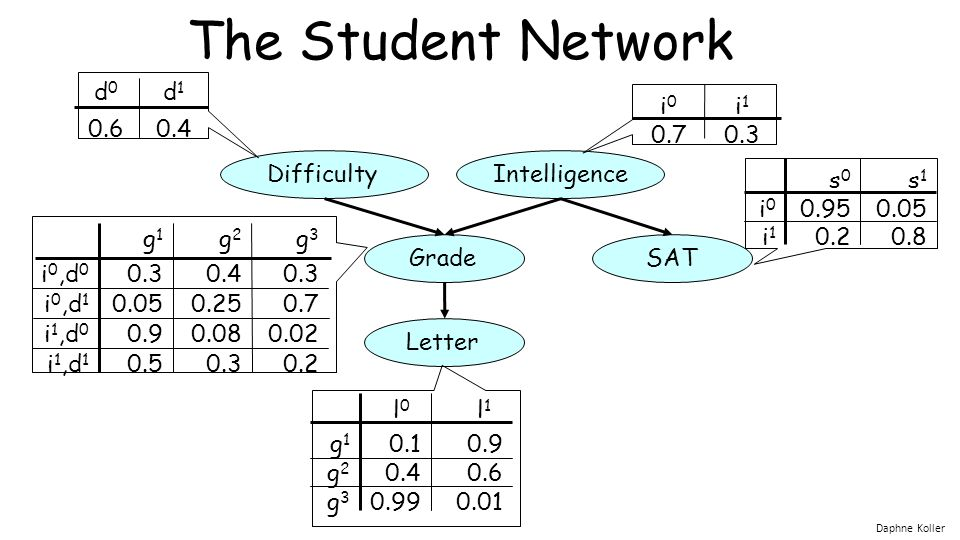

In [414]:
Image("img/Bayesian_Model.png",width=600)

In, the above example we are dealing with five random variables:

<li>Difficulty: Takes value 0 (Low Difficulty) 1 (High Difficulty)</li>
<li>Intelligence of the student:Takes value 0 (Low Difficulty) 1 (High Difficulty).</li>
<li>Grade:Takes values 1 (good grade), 2 (average grade), and 3 (bad grade).</li>
<li>SAT score: Takes values 0 (low score) and 1 (high score).</li>

The direction of the edges tells us about the cause-effect relationship. For example, Intelligence tells about the SAT score but the SAT score doesn't influence intelligence.

#### Conditional probability distributions (CPD)

The CPD of Intelligence and "Difficulty" and "Intelligence" do not depend on other variables.Here, the probability of difficulty being low is 0.6 and for high it is 0.4. Same goes for the "Intelligence" also.
Now, if we look at the CPD of "SAT", the SAT score can be low or high. The conditional probability of SAT score being low given Intelligence is also low is 0.95, that is Pr( SAT = Low | Intellegince = Low) = 0.95. Similarly, we can comprehend the conditional probabilities of all the different cases of the aboe Bayesian model.

<i>An essential requirement for Bayesian networks is that the graph must be a directed acyclic graph (DAG).</i>

<a id='section3'></a>

### 3. What is a Markov Network?

A Markov Network or Markov Random Field is an undirected graph where the nodes represent the random variables and the edges represent the connection between the random variables. These graphs could be cyclic unlike the bayesian networks. 

Markov Random Fields describe the joint probability between a set of random variables with edges representing the interactions.

For example let us consider four students represented by Alice(A), Bob(B), Charlie(C) and Debbie(D). Let us say Alice and Bob worked together on a homework while Alice and Charile did not. Here is the Markov Network representing the above example:

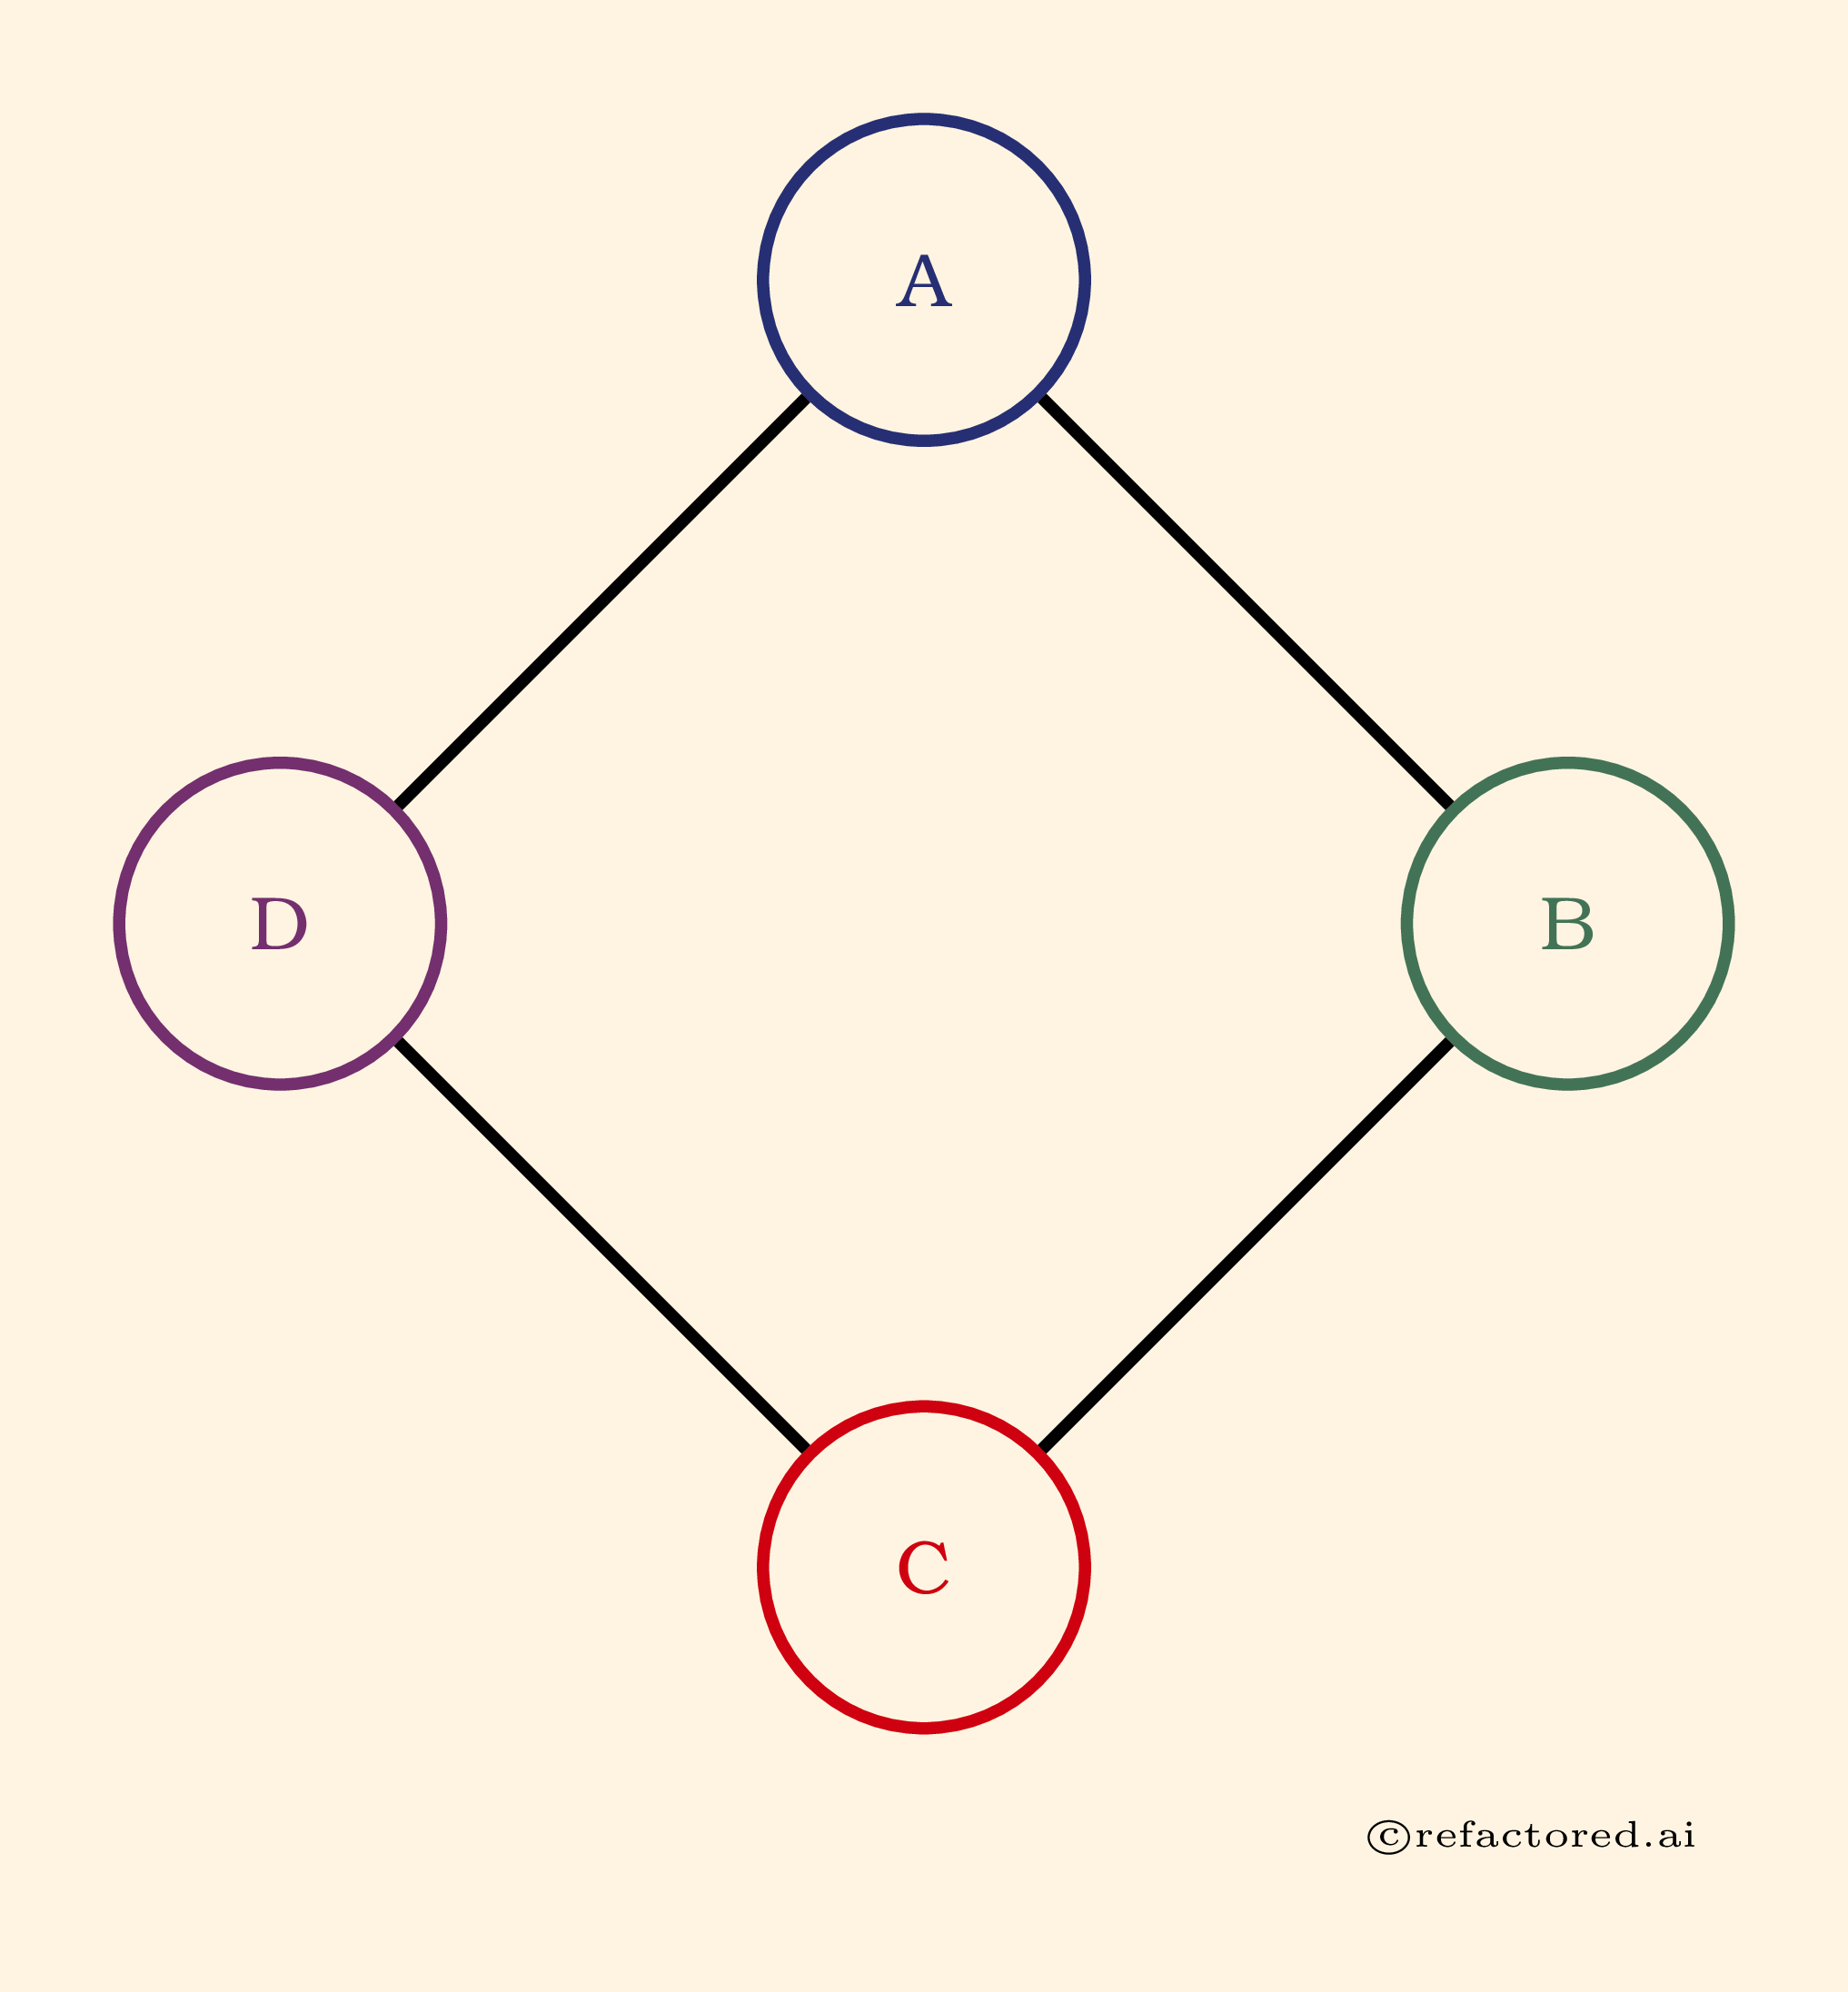

In [415]:
Image("img/markov-network.png",width=300)

#### Conditional Independence

If we consider two nodes A and C that are not connected by a link, then these variables must be conditionally independent given all other nodes in the graph namely B abd D. This follows from the fact that there is no direct path between the two nodes, and all other paths pass through nodes that are observed, and hence those paths are blocked.

#### Potential Functions / Factors

In Bayesian Models, we used CPD to understand the the relationship between two nodes, similarly in markov network we would use  a table of potential functions to incorporate the relationship between two nodes. This table is denoted by Greek symbol 𝜑.

Main difference between Potential function and Conditional Probability tables are:
<li>The values in the "Potential Function" table need not sum to one.It only tells us that configurations with higher values are more likely.</li>
<li>There is no conditioning. It is proportional to the joint distribution of all the variables involved, as opposed to conditional distributions in CPDs.</li>

In the first example, ϕ1 represents joint probability between A and B. Similarly ϕ2 represents interaction between B and C, so on.

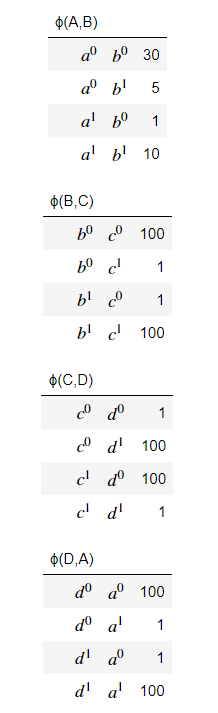

In [416]:
Image("img/Factors.png",width=150)

The joint probability via local factors is represented as:

<i>P(A,B,C,D)= 1/z ϕ1(A,B) X ϕ2(B,C) X ϕ3(C,D) X ϕ4(D,A)</i>

where ϕi represents the factor for each set of random variables, in this case interatcion between students.

Z=ΣABCD ϕ1(A,B) X ϕ2(B,C) X ϕ3(C,D) X ϕ4(D,A)

Here Z, is a normalizing constant called as a the "Partition function"

Now, we would create the above markov model using the pgmpy library

In [417]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor

# Create markov model with edges AB, BC, CD and DA
markov_model = MarkovModel([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# Create factor over the random variables A, B
# Each factor is represented by its scope,
# cardinality of each variable in the scope and their values
factor_a_b = DiscreteFactor(['A', 'B'], cardinality=[2, 2], values=[30, 5, 1, 10])
factor_b_c = DiscreteFactor(['B', 'C'], cardinality=[2, 2], values=[100,1,1,100])
factor_c_d = DiscreteFactor(['C', 'D'], cardinality=[2, 2], values=[1,100,100,1])
factor_d_a = DiscreteFactor(['D', 'A'], cardinality=[2, 2], values=[100,1,1,100])

We also define the scope of a factor to be the set of random variables over which it is defined. For example, the scope of the  factor factor_a_b is {A, B}.

In [418]:
print(factor_a_b)
print(factor_b_c)
print(factor_c_d)
print(factor_d_a)

╒═════╤═════╤════════════╕
│ A   │ B   │   phi(A,B) │
╞═════╪═════╪════════════╡
│ A_0 │ B_0 │    30.0000 │
├─────┼─────┼────────────┤
│ A_0 │ B_1 │     5.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_0 │     1.0000 │
├─────┼─────┼────────────┤
│ A_1 │ B_1 │    10.0000 │
╘═════╧═════╧════════════╛
╒═════╤═════╤════════════╕
│ B   │ C   │   phi(B,C) │
╞═════╪═════╪════════════╡
│ B_0 │ C_0 │   100.0000 │
├─────┼─────┼────────────┤
│ B_0 │ C_1 │     1.0000 │
├─────┼─────┼────────────┤
│ B_1 │ C_0 │     1.0000 │
├─────┼─────┼────────────┤
│ B_1 │ C_1 │   100.0000 │
╘═════╧═════╧════════════╛
╒═════╤═════╤════════════╕
│ C   │ D   │   phi(C,D) │
╞═════╪═════╪════════════╡
│ C_0 │ D_0 │     1.0000 │
├─────┼─────┼────────────┤
│ C_0 │ D_1 │   100.0000 │
├─────┼─────┼────────────┤
│ C_1 │ D_0 │   100.0000 │
├─────┼─────┼────────────┤
│ C_1 │ D_1 │     1.0000 │
╘═════╧═════╧════════════╛
╒═════╤═════╤════════════╕
│ D   │ A   │   phi(D,A) │
╞═════╪═════╪════════════╡
│ D_0 │ A_0 │   100.0000 │
├

We can calculate the "Partition Function" {Z} by calling the get_partition_function() of the pgmpy library

In [419]:
phi = [factor_a_b,factor_b_c,factor_c_d,factor_d_a]
markov_model.add_factors(*phi)
Z = markov_model.get_partition_function()
print(Z)

7201840.0


####  Factor operations

We would perform the below operation over the factors or the potential functions:
<li> Marginalization </li>
<li> Reduction </li>
<li> Product </li>

<i>Marginalization:</i> If we marginalize a factor ϕ whose scope is W with respect to a set of random variables X, it
means to sum out all the entries of X, to reduce its scope to {W - X}.

In [420]:
# Marginalize factor_a_b with respect to B
phi_marginalized = factor_a_b.marginalize(['B'], inplace=False)
phi_marginalized.scope()
print(phi_marginalized)

#  As we can see, its sum of all enteries of A reduce to its scope of B

╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │  35.0000 │
├─────┼──────────┤
│ A_1 │  11.0000 │
╘═════╧══════════╛


Note: A factor can be also marginalized with respect to more than one random variables using a list [ ]

<i>Reduction:</i> Reduction of a factor whose scope is W to the context xi means removing all the entries from the factor where X = xi . This reduces the scope to W − X , as phi no longer depends on X.</li>

In [421]:
# In factor_a_b phi, let's try to reduce to the context of b_0
phi_reduced = factor_a_b.reduce([('B', 0)],inplace=False)
print(phi_reduced)

╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │  30.0000 │
├─────┼──────────┤
│ A_1 │   1.0000 │
╘═════╧══════════╛


<i> Product:</i>Product refers to the product of factors ϕ1 with a scope X1 and ϕ2 with a scope of Y to produce a factor ϕ2 with a scope X unioin Y.

In [422]:
# Factors product can be accomplished with the * (product) operator

phi = factor_a_b * factor_b_c
print(phi.scope())
print(phi)

['A', 'B', 'C']
╒═════╤═════╤═════╤══════════════╕
│ A   │ B   │ C   │   phi(A,B,C) │
╞═════╪═════╪═════╪══════════════╡
│ A_0 │ B_0 │ C_0 │    3000.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_0 │ B_0 │ C_1 │      30.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_0 │ B_1 │ C_0 │       5.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_0 │ B_1 │ C_1 │     500.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_1 │ B_0 │ C_0 │     100.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_1 │ B_0 │ C_1 │       1.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_1 │ B_1 │ C_0 │      10.0000 │
├─────┼─────┼─────┼──────────────┤
│ A_1 │ B_1 │ C_1 │    1000.0000 │
╘═════╧═════╧═════╧══════════════╛


Now that we know how to calculate the factor products and partition function, we can now calculate the joint probability distribution by using the formula:

P(A,B,C,D)= 1/Z X ϕ1(A,B) X ϕ2(B,C) X ϕ3(C,D) X ϕ4(D,A)

where, Z=ΣABCD ϕ1(A,B) X ϕ2(B,C) X ϕ3(C,D) X ϕ4(D,A)


In [423]:
phi1 = factor_a_b*factor_b_c*factor_c_d*factor_d_a
joint = phi1 * (1/Z)
print(joint)

╒═════╤═════╤═════╤═════╤════════════════╕
│ A   │ B   │ C   │ D   │   phi(A,B,C,D) │
╞═════╪═════╪═════╪═════╪════════════════╡
│ A_0 │ B_0 │ C_0 │ D_0 │         0.0417 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_0 │ C_0 │ D_1 │         0.0417 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_0 │ C_1 │ D_0 │         0.0417 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_0 │ C_1 │ D_1 │         0.0000 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_1 │ C_0 │ D_0 │         0.0001 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_1 │ C_0 │ D_1 │         0.0001 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_1 │ C_1 │ D_0 │         0.6943 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_0 │ B_1 │ C_1 │ D_1 │         0.0001 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_1 │ B_0 │ C_0 │ D_0 │         0.0000 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_1 │ B_0 │ C_0 │ D_1 │         0.1389 │
├─────┼─────┼─────┼─────┼────────────────┤
│ A_1 │ B_0

#### Factor Graph

A factor graph is a bipartite graph with disjoint set being variable nodes, representing the variables, and the other being factor nodes, representing factors.

An edge between a variable node and a factor node denotes that the random variable belongs to the scope of the factor.

In pgmpy, factor graphs can be created as follows:

In [424]:
# First import FactorGraph class from pgmpy.models
from pgmpy.models import FactorGraph
mm = MarkovModel()
mm.add_nodes_from(['A', 'B', 'C'])
mm.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])
phi1 = DiscreteFactor(['A', 'B'], cardinality=[2, 2], values = np.random.rand(4))
phi2 = DiscreteFactor(['B', 'C'], cardinality=[2, 2], values = np.random.rand(4))
phi3 = DiscreteFactor(['C', 'A'], cardinality=[2, 2], values = np.random.rand(4))
mm.add_factors(phi1, phi2, phi3)
factor_graph_from_mm = mm.to_factor_graph()

# Factor Nodes
factor_graph_from_mm.nodes()

NodeView(('A', 'B', 'C', 'phi_A_B', 'phi_B_C', 'phi_C_A'))

#### Converting Bayesian model into a markov model

We can also convert, a Bayesian model into a Markov model by using to the to_markov_model() function.

We would try to create a Bayesian model for the below example and convert it into a Markov Model

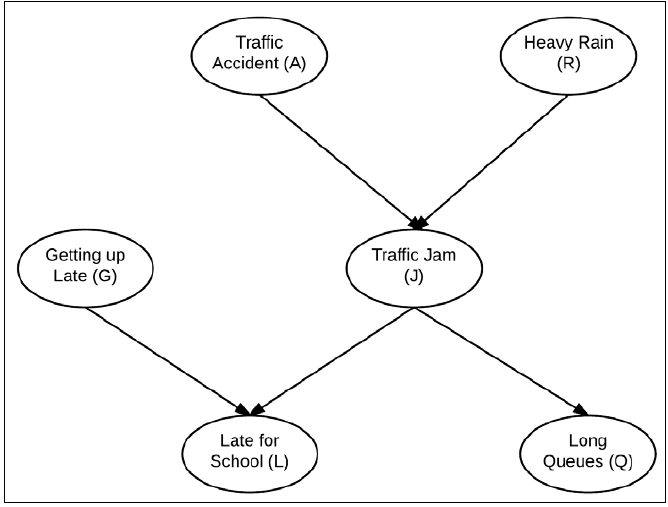

In [425]:
Image("img/Bayesian_Model1.png",width=350)

In [426]:
#TabularCPD is used to create the Conditional Probability Table of a node in Bayesian Network
from pgmpy.factors.discrete import TabularCPD

#Creating the above bayesian network

# Create the Bayesian Model
model = BayesianModel()

#Add the nodes
model.add_nodes_from(['Rain', 'TrafficJam'])

# Adding the edges
model.add_edge('Rain', 'TrafficJam')
model.add_edge('Accident', 'TrafficJam')

# Creating the CPD table
cpd_rain = TabularCPD('Rain', 2, [[0.4], [0.6]])
cpd_accident = TabularCPD('Accident', 2, [[0.2], [0.8]])
cpd_traffic_jam = TabularCPD(
                'TrafficJam', 2,
                [[0.9, 0.6, 0.7, 0.1],
                [0.1, 0.4, 0.3, 0.9]],
                evidence=['Rain', 'Accident'],
                evidence_card=[2, 2])

# Adding the CPDs to the model
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam)

#Add the nodes
model.add_node('LongQueues')
model.add_edge('TrafficJam', 'LongQueues')

# Creating the CPD table
cpd_long_queues = TabularCPD('LongQueues', 2,
                [[0.9, 0.2],
                [0.1, 0.8]],
                evidence=['TrafficJam'],
                evidence_card=[2])

# Adding the CPDs to the model
model.add_cpds(cpd_long_queues)
model.add_nodes_from(['GettingUpLate', 'LateForSchool'])
model.add_edges_from([('GettingUpLate', 'LateForSchool'),('TrafficJam', 'LateForSchool')])

# Creating the CPD table for GettingUpLate and LateForSchool
cpd_getting_up_late = TabularCPD('GettingUpLate', 2,[[0.6], [0.4]])
cpd_late_for_school = TabularCPD(
                    'LateForSchool', 2,
                    [[0.9, 0.45, 0.8, 0.1],
                    [0.1, 0.55, 0.2, 0.9]],
                    evidence=['GettingUpLate','TrafficJam'],
                    evidence_card=[2, 2])

#Adding the CPDs to the model
model.add_cpds(cpd_getting_up_late, cpd_late_for_school)

#Function to convert the Bayesian Model into the Markov model
mm = model.to_markov_model()
print(mm.edges())

[('Rain', 'TrafficJam'), ('Rain', 'Accident'), ('TrafficJam', 'LongQueues'), ('TrafficJam', 'LateForSchool'), ('TrafficJam', 'Accident'), ('TrafficJam', 'GettingUpLate'), ('LateForSchool', 'GettingUpLate')]


Now, the model will look like this

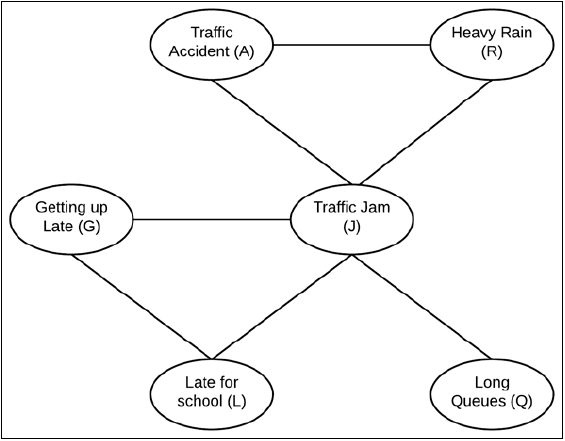

In [427]:
Image("img/Converted_mm.png",width=350)

#### Chordal graphs

As we can see from the above example, when we convert a Bayesian Model into a Marov Model, we lose independence of parent nodes.
Addition of extra edges to convert a Markov model into a Bayesian one leads to the loss of local independence information

For example, in the above exaple, Traffic Accident (A) and Heavy Rain(R) were independent in the Bayesian Model

The process of converting a non-chordal graph into a chordal one is called triangulation. A triangulated graph can be obtained from an undirected graph by adding links

In, the belwo example we would see how to triangulate a graph

In [428]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np
model2 = MarkovModel()

from pgmpy.models import FactorGraph
mm = MarkovModel()
mm.add_nodes_from(['A', 'B', 'C'])
mm.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])
phi1 = DiscreteFactor(['A', 'B'], cardinality=[2, 2], values = np.random.rand(4))
phi2 = DiscreteFactor(['B', 'C'], cardinality=[2, 2], values = np.random.rand(4))
phi3 = DiscreteFactor(['C', 'A'], cardinality=[2, 2], values = np.random.rand(4))
mm.add_factors(phi1, phi2, phi3)

#Function to check if the model is consistent or not
mm.check_model()

chordal_graph = mm.triangulate()
chordal_graph.edges()

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'C')])

<a id='section4'></a>

### 4. Probabilistic inference from a Markov Model

The advantages of PGMs over standard probabilistic ways of determining conditional probability distributions is that it allows expression of the graphical model as a joint distribution over all random variables. This then allows us to marginalize over the random variables to determine quantities of interest. The joint probability distribution associated with a given graph can be expressed as a product over potential functions associated with subsets of nodes in the graph.

<i>Inference</i>: Given a graphical model, we want to answer questions about unobserved variables.

<a id='section5'></a>

### 5. Parameter estimation ( Maximum Likelihood Parameter estimation)

Let's take a very simple example of the network, X — Y — Z. We have two potentials, ϕ1( X ,Y ) and ϕ2(Y,Z) . We can now define the joint distribution over this network as follows:

P(X,Y,Z) = 1/Z . ϕ1(X,Y) . ϕ2(Y,Z)

Here, Z is the partition function and is defined as follows:

Z=Σ ϕ1(X,Y). ϕ2(Y,Z) 

Therefore, the log-likelihood equation for a single instance <x, y, z> would be
as follows:

ln P(x,y,z) = ln ϕ1(x,y) + ln ϕ2(y,z) - lnZ

Suppose we have a dataset D containing M samples, the likelihood is derived as:

M ln Z(ϕ) = M(ln ϕ1(x,y)) + (ln ϕ2(y,z))

Now, let's see some code examples to learn parameters using pgmpy:

In [429]:
import pandas as pd
import numpy as np
from pgmpy.models import MarkovModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# Generating some random data
raw_data = np.random.randint(low=0, high=2, size=(100, 2))
#Convert it into dataframe
data = pd.DataFrame(raw_data, columns=['A', 'B'])
data.head()

,A,B
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [430]:
#Markov Model
markov_model = MarkovModel([('A', 'B')])

# An issue has been reported with the "fit" function of the latest version of pgmpy MarkovModel library
#https://github.com/pgmpy/pgmpy/issues/835

#The general command to fit the model would be as followed:

#markov_model.fit(data, estimator=MaximumLikelihoodEstimator)
#factors = markov_model.get_factors()
#print(factors[0])

## References

<li>pgmpy documentation http://pgmpy.org/index.html</li>
<li>pgmpy: Probabilistic Graphical Models using Python https://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf</li>
<li>Mastering pgm using Python https://www.packtpub.com/big-data-and-business-intelligence/mastering-probabilistic-graphical-models-using-python</li>
<li>Probabilistic Graphical Models https://blog.statsbot.co/probabilistic-graphical-models-tutorial-and-solutions-e4f1d72af189 </li>